### QUESTION

What are the main characteristics which have the most impact on purchase amount of customer against various products 

In [61]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Use pandas method <code> read_csv() </code> to load the data

In [2]:
df = pd.read_csv("train.csv")

# display first five rows of the dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# display last five rows of the dataframe
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


## About Dataset

<h3> Dataset History </h3>
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

#### Tasks to perform
Purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset.

<b> Data Preprocessing </b>

* Check basic statistics of dataset
* Check for missing values in the data
* check for unique values in data
* Perform EDA
* Purchase Distribution
* check for outliers
* Analysis by Gender, Marital Status, occupation, occupation vs purchase , purchase by city, purchase by age group, etc
* Drop unnecessary fields
* Convert categorical data into integer using map function (e.g 'Gender' column)
* missing value treatment
* Rename columns
* fill nan values
* map range variables into integers (e.g 'Age' column)

<b> Data Visualisation </b>

* visualize individul column
* Age vs Purchased
* Occupation vs Purchased
* Productcategory1 vs Purchased
* Productcategory2 vs Purchased
* Productcategory3 vs Purchased
* City category pie chart
* check for more possible plots

#### Basic Statistics of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.shape

(550068, 12)

<h4>Identify missing values</h4>

In [6]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

User_ID
False    550068
Name: User_ID, dtype: int64

Product_ID
False    550068
Name: Product_ID, dtype: int64

Gender
False    550068
Name: Gender, dtype: int64

Age
False    550068
Name: Age, dtype: int64

Occupation
False    550068
Name: Occupation, dtype: int64

City_Category
False    550068
Name: City_Category, dtype: int64

Stay_In_Current_City_Years
False    550068
Name: Stay_In_Current_City_Years, dtype: int64

Marital_Status
False    550068
Name: Marital_Status, dtype: int64

Product_Category_1
False    550068
Name: Product_Category_1, dtype: int64

Product_Category_2
False    376430
True     173638
Name: Product_Category_2, dtype: int64

Product_Category_3
True     383247
False    166821
Name: Product_Category_3, dtype: int64

Purchase
False    550068
Name: Purchase, dtype: int64



Based on the summary above, each column has 550068 rows of data and two of the columns containing missing data:

<ol>
    <li>"Product_Category_2": 173638 missing data</li>
    <li>"Product_Category_3": 383247 missing data</li>
</ol>

In [7]:
# Product_Category_3 has lots of Nan values, so we can drop the column instead of filling it because it would not affect the analysis that much.
df = df.drop(columns =['Product_Category_3'])

#### Categorizing Columns

In [8]:
uniqueValues = df.nunique()
print(uniqueValues)

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Purchase                      18105
dtype: int64


In [9]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [10]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [12]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
# Classifying Age into Categorical Data

df['Age']=df['Age'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})


* Age Group 0-17 into Child Group
* Age Group 18-25 into Teenagers Group 
* Age Group 26-35 into Adult Group
* Age Group 36-45 into Adult Group
* Age Group 46-50 into Adult Group
* Age Group 51-55 into Old Group
* Age Group 55+ into Old Group

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,NaN,7969


#### Rename Columns

'City_Category' to 'City'

'Stay_In_Current_City_Years' to 'Years_in_City'

In [15]:
df.rename(columns = {'City_Category':'City', 'Stay_In_Current_City_Years':'Years_in_City'}, inplace = True)

In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,NaN,7969


#### Filling Nan values in Product_Category_2 Column.

In [17]:
# from  statistics import mode
pc2 = df.groupby(['Age'])['Product_Category_2'].agg(pd.Series.mode)
pc2

Age
Adult      8.0
Child      4.0
Old        8.0
Teenage    8.0
Name: Product_Category_2, dtype: float64

In [18]:
# fill the missing values with the age group values for each group
child = df.loc[df['Age'] == 'Child' ,'Product_Category_2'].fillna(pc2['Child'])
df.loc[df['Age']=='Child','Product_Category_2'] = child

adult = df.loc[df['Age']== 'Adult', 'Product_Category_2'].fillna(pc2['Adult'])
df.loc[df['Age']== 'Adult', 'Product_Category_2'] = adult

old = df.loc[df['Age']== 'Old', 'Product_Category_2'].fillna(pc2['Old'])
df.loc[df['Age']== 'Old', 'Product_Category_2'] = old

teenage = df.loc[df['Age']== 'Teenage', 'Product_Category_2'].fillna(pc2['Teenage'])
df.loc[df['Age']== 'Teenage', 'Product_Category_2'] = teenage

df['Product_Category_2']


0          4.0
1          6.0
2          4.0
3         14.0
4          8.0
          ... 
550063     8.0
550064     8.0
550065     8.0
550066     8.0
550067     8.0
Name: Product_Category_2, Length: 550068, dtype: float64

In [19]:
df['Product_Category_2'].isnull().value_counts()

False    550068
Name: Product_Category_2, dtype: int64

In [20]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,Child,10,A,2,0,3,4.0,8370
1,1000001,P00248942,F,Child,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,Child,10,A,2,0,12,4.0,1422
3,1000001,P00085442,F,Child,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,Old,16,C,4+,0,8,8.0,7969


#### Convert categorical data into integer using map function (e.g 'Gender' column)

In [21]:
# Assign Male=0 and Female=1
df['Gender']=df['Gender'].map({'M':0 , 'F':1})

In [73]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,4.0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6.0,15200
2,1000001,P00087842,1,Child,10,A,2,0,12,4.0,1422
3,1000001,P00085442,1,Child,10,A,2,0,12,14.0,1057
4,1000002,P00285442,0,Old,16,C,4+,0,8,8.0,7969
5,1000003,P00193542,0,Adult,15,A,3,0,1,2.0,15227
6,1000004,P00184942,0,Adult,7,B,2,1,1,8.0,19215
7,1000004,P00346142,0,Adult,7,B,2,1,1,15.0,15854
8,1000004,P0097242,0,Adult,7,B,2,1,1,16.0,15686
9,1000005,P00274942,0,Adult,20,A,1,1,8,8.0,7871


In [74]:
df.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
550058,1006024,P00372445,0,Adult,12,A,0,1,20,8.0,121
550059,1006025,P00370853,1,Adult,1,B,1,0,19,8.0,48
550060,1006026,P00371644,0,Adult,6,C,1,1,20,8.0,494
550061,1006029,P00372445,1,Adult,1,C,1,1,20,8.0,599
550062,1006032,P00372445,0,Adult,7,A,3,0,20,8.0,473
550063,1006033,P00372445,0,Old,13,B,1,1,20,8.0,368
550064,1006035,P00375436,1,Adult,1,C,3,0,20,8.0,371
550065,1006036,P00375436,1,Adult,15,B,4+,1,20,8.0,137
550066,1006038,P00375436,1,Old,1,C,2,0,20,8.0,365
550067,1006039,P00371644,1,Adult,0,B,4+,1,20,8.0,490


#### Check Data types

In [45]:
df.dtypes

User_ID                 int64
Product_ID             object
Gender                  int64
Age                    object
Occupation              int64
City                   object
Years_in_City          object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
dtype: object

### Exploratory Data Analysis

In [23]:
df.describe()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,0.246895,8.076707,0.409653,5.404270,9.228379,9263.968713
std,1.727592e+03,0.431205,6.522660,0.491770,3.936211,4.318496,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.001516e+06,0.000000,2.000000,0.000000,1.000000,8.000000,5823.000000
50%,1.003077e+06,0.000000,7.000000,0.000000,5.000000,8.000000,8047.000000
75%,1.004478e+06,0.000000,14.000000,1.000000,8.000000,14.000000,12054.000000
max,1.006040e+06,1.000000,20.000000,1.000000,20.000000,18.000000,23961.000000


In [29]:
df.corr()

,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,0.033474,-0.023971,0.020443,0.003825,0.003810,0.004716
Gender,0.033474,1.000000,-0.117291,0.011603,0.045594,0.011010,-0.060346
Occupation,-0.023971,-0.117291,1.000000,0.024280,-0.007618,0.000793,0.020833
Marital_Status,0.020443,0.011603,0.024280,1.000000,0.019888,0.016449,-0.000463
Product_Category_1,0.003825,0.045594,-0.007618,0.019888,1.000000,0.273386,-0.343703
Product_Category_2,0.003810,0.011010,0.000793,0.016449,0.273386,1.000000,-0.124823
Purchase,0.004716,-0.060346,0.020833,-0.000463,-0.343703,-0.124823,1.000000


<AxesSubplot:>

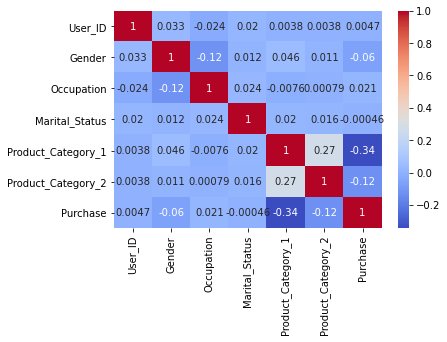

In [30]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [31]:
gender_counts=df['Gender'].value_counts().to_frame()
gender_counts

,Gender
0,414259
1,135809


In [26]:
marital_status_counts=df['Marital_Status'].value_counts().to_frame()
marital_status_counts

,Marital_Status
0,324731
1,225337


In [28]:
city_counts=df['City'].value_counts().to_frame()
city_counts

,City
B,231173
C,171175
A,147720


In [68]:
pc1_counts=df['Product_Category_1'].value_counts().to_frame()
pc1_counts

,Product_Category_1
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828
15,6290


In [69]:
pc2_counts=df['Product_Category_2'].value_counts().to_frame()
pc2_counts

,Product_Category_2
8.0,233272
14.0,55108
2.0,49217
16.0,43255
15.0,37855
4.0,30131
5.0,26235
6.0,16466
11.0,14134
17.0,13320


<h3>Data Visualization</h3>

#### Visualize Individul Column

#### Age vs Purchased

<AxesSubplot:xlabel='Age', ylabel='count'>

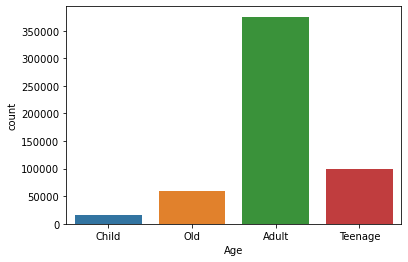

In [38]:
sns.countplot(x='Age', data=df)

People aged 26 to 50 are the frequent buyers 

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

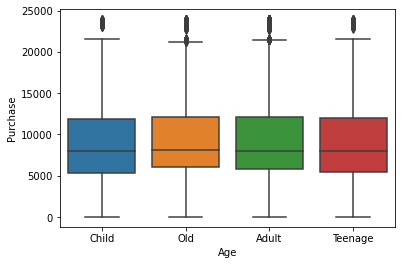

In [36]:
sns.boxplot(x='Age', y='Purchase', data=df)

People aged 50 and above purchase more from the shop

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

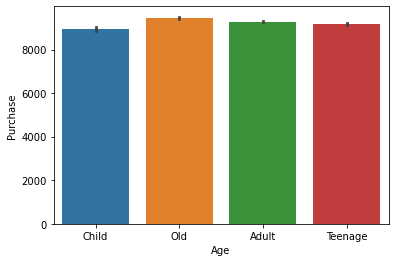

In [78]:
sns.barplot(x='Age', y='Purchase', data=df)

People aged 50 and above spend more 

#### Occupation vs Purchased

<AxesSubplot:xlabel='Occupation', ylabel='count'>

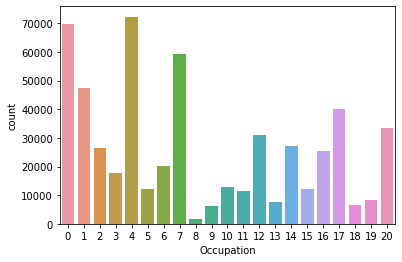

In [39]:
sns.countplot(x='Occupation', data=df)

More customers are in occupation 4 and 0 with the least in occupation 8

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

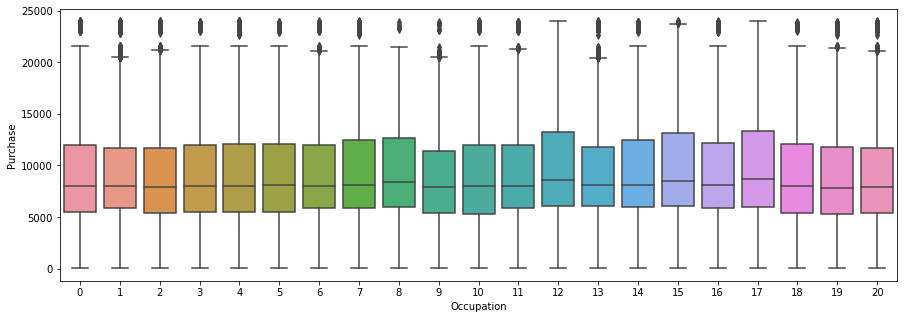

In [62]:
pyplot.figure(figsize=(15,5))
sns.boxplot(x='Occupation', y='Purchase', data=df)

We see that the distributions of purchase between the different occupation categories have a significant overlap, so occupation would not be a good predictor of purchase

#### Years_in_City vs Purchased

<AxesSubplot:xlabel='Years_in_City', ylabel='count'>

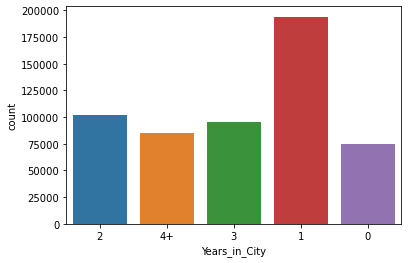

In [51]:
sns.countplot(x='Years_in_City', data=df)

Most of the customers have stayed in the city for one year

<AxesSubplot:xlabel='Years_in_City', ylabel='Purchase'>

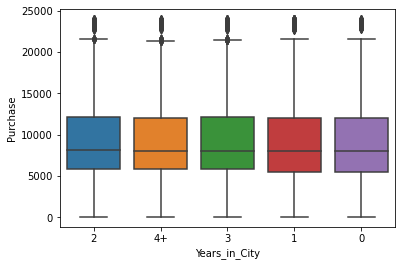

In [52]:
sns.boxplot(x='Years_in_City', y='Purchase', data=df)

<AxesSubplot:xlabel='Years_in_City', ylabel='Purchase'>

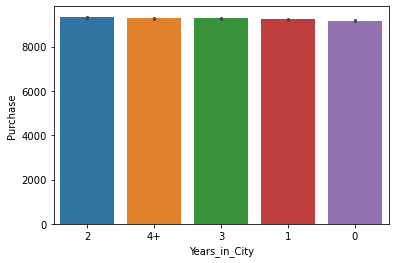

In [79]:
sns.barplot(x='Years_in_City', y='Purchase', data=df)

We see that the distributions of purchase between the different years in current city categories have a significant overlap, so it would not be a good predictor of purchase

#### Product_Category_1 vs Purchased

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

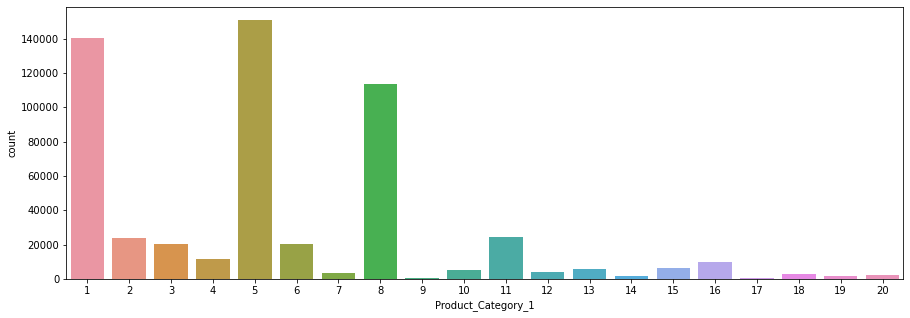

In [72]:
pyplot.figure(figsize = (15,5))
sns.countplot(x='Product_Category_1', data=df)

Product 5 has the highest count meaning it is the most purchased

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

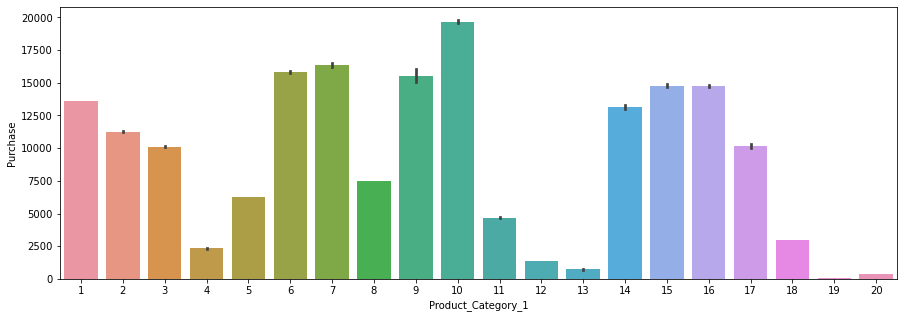

In [65]:
pyplot.figure(figsize = (15,5))
sns.barplot(x='Product_Category_1', y='Purchase', data=df)

People spend more after purchasing product 10

####  Product_category_2 vs Purchased

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

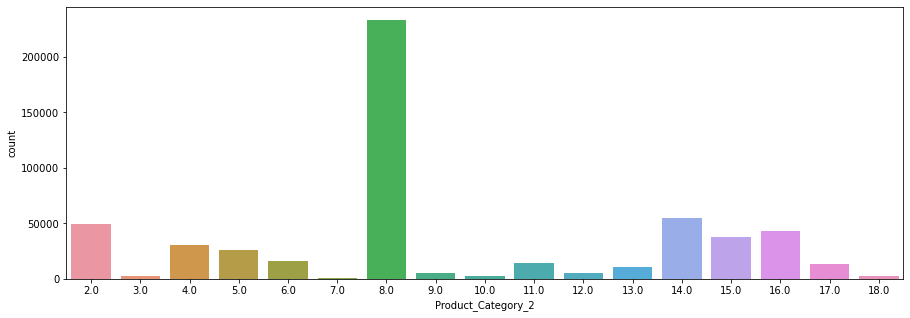

In [75]:
pyplot.figure(figsize = (15,5))
sns.countplot(x='Product_Category_2', data=df)

Product 8 is the most bought

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

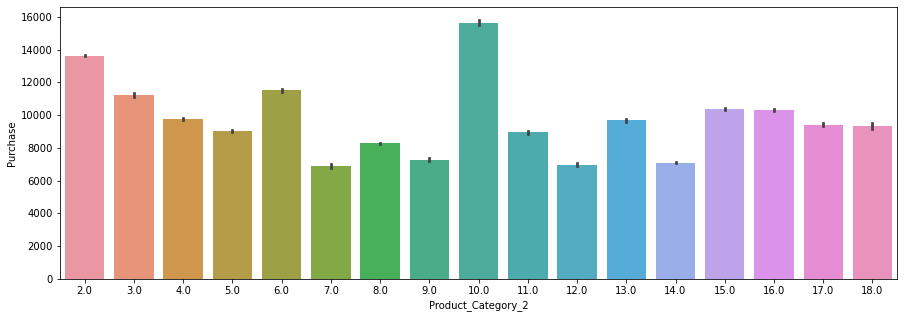

In [63]:
pyplot.figure(figsize = (15,5))
sns.barplot(x = df['Product_Category_2'], y =df['Purchase'])

Product 10 has the highest price

#### City vs Purchased

<AxesSubplot:xlabel='City', ylabel='count'>

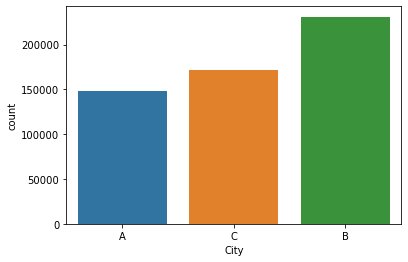

In [80]:
sns.countplot(x ='City', data =df)

In [91]:
d = df['City'].value_counts()
d

B    231173
C    171175
A    147720
Name: City, dtype: int64

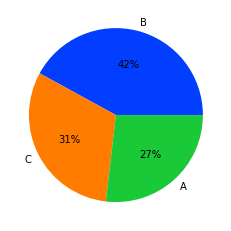

In [92]:
keys = ['B','C','A']
palette_color = sns.color_palette('bright')
pyplot.pie(d,labels = keys, colors=palette_color, autopct='%.0f%%')
pyplot.show()

Most of the customers reside in city B

<AxesSubplot:xlabel='City', ylabel='Purchase'>

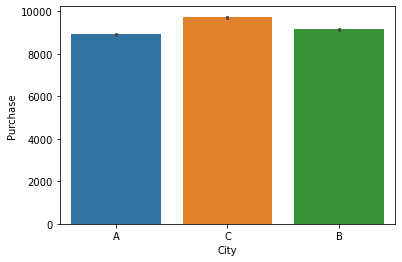

In [81]:
sns.barplot(x='City', y='Purchase', data=df)

<AxesSubplot:xlabel='City', ylabel='Purchase'>

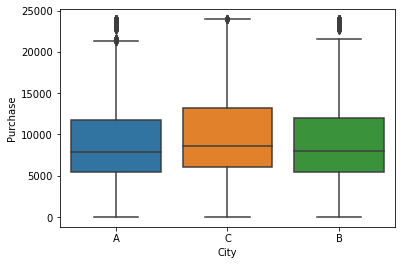

In [83]:
sns.boxplot(x='City', y='Purchase', data=df)

Customers from city C spend more in the shop

#### Marital_Status vs Purchased

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

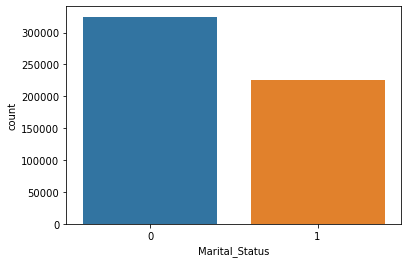

In [95]:
sns.countplot(x ='Marital_Status', data =df)

More unmarried people visit the shop

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

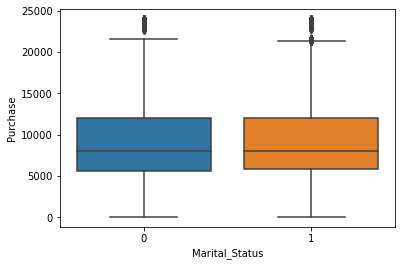

In [96]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)

In [98]:
df_group_one=df[['Marital_Status', 'Purchase']]
df_group_one = df_group_one.groupby(['Marital_Status'], as_index=False).mean()
df_group_one

,Marital_Status,Purchase
0,0,9265.907619
1,1,9261.174574


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

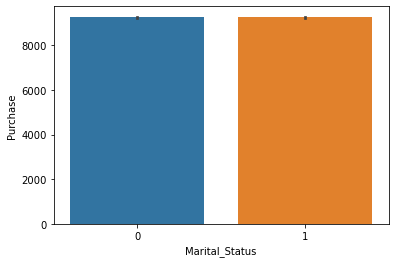

In [97]:
sns.barplot(x='Marital_Status', y='Purchase', data=df)

The purchase amount between the married and unmarried is averagely the same

#### Gender vs Purchase

<AxesSubplot:xlabel='Gender', ylabel='count'>

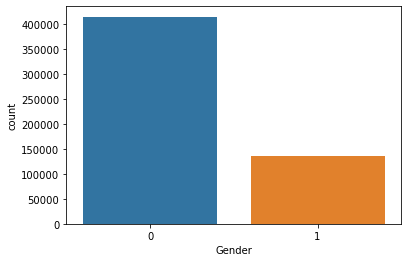

In [99]:
sns.countplot(x ='Gender', data =df)

Men are the frequent customers

In [101]:
df_group_one=df[['Gender', 'Purchase']]
df_group_one = df_group_one.groupby(['Gender'], as_index=False).mean()
df_group_one

,Gender,Purchase
0,0,9437.526040
1,1,8734.565765


<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

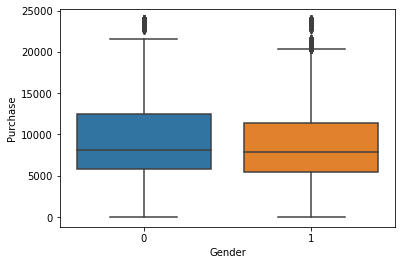

In [102]:
sns.boxplot(x='Gender', y='Purchase', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

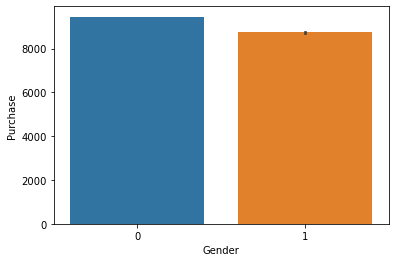

In [103]:
sns.barplot(x='Gender', y='Purchase', data=df)

Men spend more than women in the shop

### Grouping

Let's group 'Gender' and 'Product_Category_1'

In [104]:
df_gptest=df[['Gender', 'Product_Category_1', 'Purchase']]
grouped_test1 = df_gptest.groupby(['Gender', 'Product_Category_1'], as_index=False).mean()
grouped_test1

,Gender,Product_Category_1,Purchase
0,0,1,13608.164721
1,0,2,11203.590520
2,0,3,10026.550081
3,0,4,2273.512694
4,0,5,6214.230729
5,0,6,15907.851009
6,0,7,16355.789777
7,0,8,7498.554419
8,0,9,15498.888235
9,0,10,19670.731264


In [105]:
grouped_pivot = grouped_test1.pivot(index='Gender', columns='Product_Category_1')
grouped_pivot

Purchase                                           \
Product_Category_1            1             2             3            4    
Gender                                                                      
0                   13608.164721  11203.590520  10026.550081  2273.512694   
1                   13597.162619  11407.496819  10262.656677  2454.851882   

                                                                          \
Product_Category_1           5             6             7            8    
Gender                                                                     
0                   6214.230729  15907.851009  16355.789777  7498.554419   
1                   6307.239532  15596.428164  16394.853659  7499.924787   

                                                                          \
Product_Category_1            9             10           11           12   
Gender                                                                     
0                   15498.888235  19670.731264  4687.425261  1305.154037   
1                   15724.314286  19692.076592  4676.371808  1422.909269   

                                                                         \
Product_Category_1          13            14           15            16   
Gender                                                                    
0                   718.306092  12722.321111  14797.43135  14793.384056   
1                   733.846785  13747.362761  14695.32696  14681.491257   

                                                                      
Product_Category_1            17           18         19          20  
Gender                                                                
0                   10209.732558  2990.168793  36.793403  370.052545  
1                    9846.403226  2848.607330  37.676275  371.564315

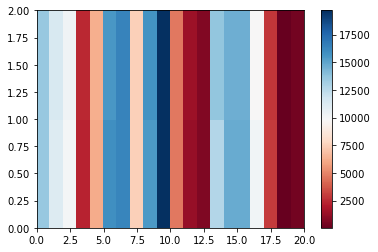

In [107]:
pyplot.pcolor(grouped_pivot, cmap='RdBu')
pyplot.colorbar()
pyplot.show()

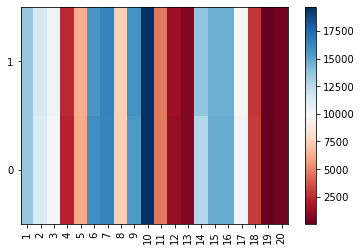

In [109]:
fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

Both genders spend more on product 10

Let's group 'Age' and 'Gender'

In [114]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,1,Child,10,A,2,0,3,4.0,8370
1,1000001,P00248942,1,Child,10,A,2,0,1,6.0,15200
2,1000001,P00087842,1,Child,10,A,2,0,12,4.0,1422
3,1000001,P00085442,1,Child,10,A,2,0,12,14.0,1057
4,1000002,P00285442,0,Old,16,C,4+,0,8,8.0,7969


In [115]:
df.dtypes

User_ID                 int64
Product_ID             object
Gender                  int64
Age                    object
Occupation              int64
City                   object
Years_in_City          object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
dtype: object

In [119]:
df_gptest1=df[['Age','Gender', 'Purchase']]
grouped_test2 = df_gptest1.groupby(['Age','Gender'], as_index=False).mean()
grouped_test2

,Age,Gender,Purchase
0,Adult,0,9416.784450
1,Adult,1,8813.797698
2,Child,0,9235.173670
3,Child,1,8338.771985
4,Old,0,9607.760882
5,Old,1,9030.430794
6,Teenage,0,9440.942971
7,Teenage,1,8343.180201


In [120]:
grouped_pivot1 = grouped_test2.pivot(index='Gender', columns='Age')
grouped_pivot1

Purchase                                       
Age           Adult        Child          Old      Teenage
Gender                                                    
0       9416.784450  9235.173670  9607.760882  9440.942971
1       8813.797698  8338.771985  9030.430794  8343.180201

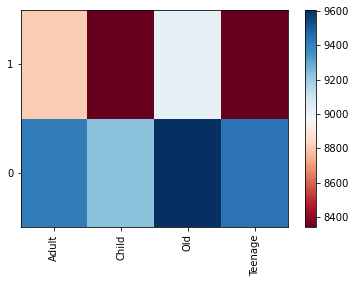

In [121]:
fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot1, cmap='RdBu')

#label names
row_labels = grouped_pivot1.columns.levels[1]
col_labels = grouped_pivot1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

Men aged 50 and above purchase more

Generally men spend more in the shop